In [1]:
from visualizations import *
from graphs import *

In [88]:
modelpath = "../saved/models/paper_mnist_model.pt" #path to the saved model
modeltype = "mnist" #type of model: 'mnist' or 'coco'
n = 2 #number of objects
strength = 0.2 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype)

MNIST Object Based Attention Model v2
../mnist
Data Loaded:
	Training Samples:  42000
	Validation Samples:  18000
	Testing Samples:  10000
	Objects:  2 	Strength:  0.2 	Noise:  0.3 	Resample:  True


In [2]:
modelpath = "../saved/models/paper_coco_model.pt" #path to the saved model
modeltype = "coco" #type of model: 'mnist' or 'coco'
cocoroot = '../../../../data/jordanlei/coco/images/val2017' #path to the coco val dataset
annpath = '../../../../data/jordanlei/coco/annotations/instances_val2017.json' #path to the coco val annotations
metadatapath = '../data/metadata/cocometadata_test.p' #path to metadata file (will create one if none exists)

n = 2 #number of objects
strength = 0.9 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype,\
                                               cocoroot = cocoroot, annpath = annpath, metadatapath = metadatapath)

COCO Object-Based Attention Model v3
loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


In [97]:
loader = DataLoader(test_loader.dataset, batch_size = 1, shuffle = True, num_workers=4)
n = 2


inhibiteds = []
not_inhibiteds = []

for i, (x, data, labels) in enumerate(loader):
    masks, hiddens, ior, selects_x = runner.visualize(x, data, labels)
    x = x.detach().cpu().numpy()
    
    inhibited = 0
    not_inhibited = 0
    
    for k in range(n):
        mask = masks[k]
        hidden = hiddens[k]
        selectx = selects_x[k]
        
        targethidden = ((x - selectx + 0.000001) / (x + 0.000001)) / strength
        targethidden = (targethidden > 0.5)
        
        inhibited += np.mean(hidden[targethidden])
        not_inhibited += np.mean(hidden[np.logical_not(targethidden)])
    
    inhibiteds.append(inhibited / n)
    not_inhibiteds.append(not_inhibited / n)
    
    if i % int(len(loader) / 30) == 0: 
        print(i)
    

0
333
666
999
1332
1665
1998
2331
2664
2997
3330
3663
3996
4329
4662
4995
5328
5661
5994
6327
6660
6993
7326
7659
7992
8325
8658
8991
9324
9657
9990


In [98]:
5 % int(len(loader) / 30)

5

In [99]:
print(np.mean(inhibiteds))
print(np.mean(not_inhibiteds))

0.9072873575866223
0.11135004015021113


In [104]:
values = inhibiteds + not_inhibiteds
labels = ["Not Attended"]*len(inhibiteds) + ["Attended"]*len(not_inhibiteds)

df = pd.DataFrame({"inhibition": values, "condition": labels})

Text(0, 0.5, 'Attention-Modulated Gating (%)')

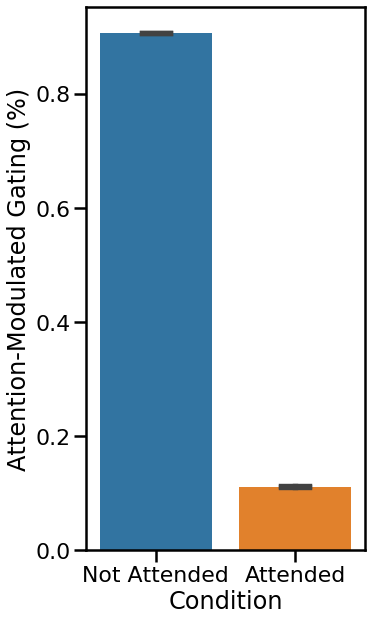

In [109]:
plt.figure(figsize=(5, 10))
sns.set_context("poster")
sns.barplot(data = df, x = "condition", y = "inhibition", capsize=.2)
plt.xlabel("Condition")
plt.ylabel("Attention-Modulated Gating (%)")

In [79]:
np.mean(not_inhibiteds)

0.6075254734778333

In [51]:
hidden[targethidden].shape

(807252,)

In [52]:
targethidden.shape

(32, 3, 100, 100)

In [38]:
np.sum(targethidden > 0.5)

785877

In [39]:
len(attended_val)

772957

In [70]:
inhibited

1.7284348011016846

In [71]:
not_inhibited

0.7561932913959026

In [68]:
not_inhibited_val

0.50263965